In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import datasets, layers, models

In [ ]:
(train, valid, test), ds_info = tfds.load(
    'cifar10',
    split=['train', 'test[:20%]', 'test[20%:80%]'],
    shuffle_files=True,
    as_supervised=True,  # Returns tuple (img, label)
    with_info=True,      # Also return the dataset info
)

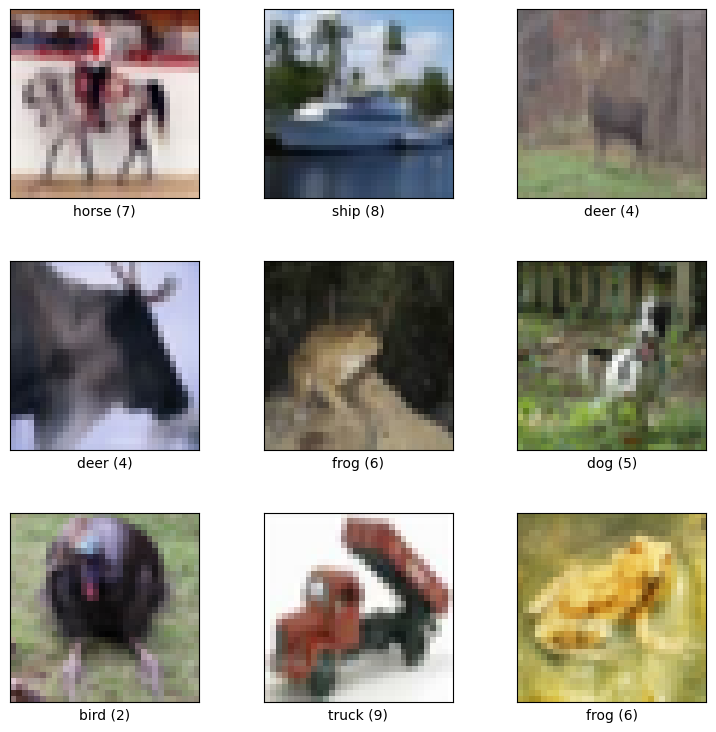

In [ ]:
fig = tfds.show_examples(train, ds_info)

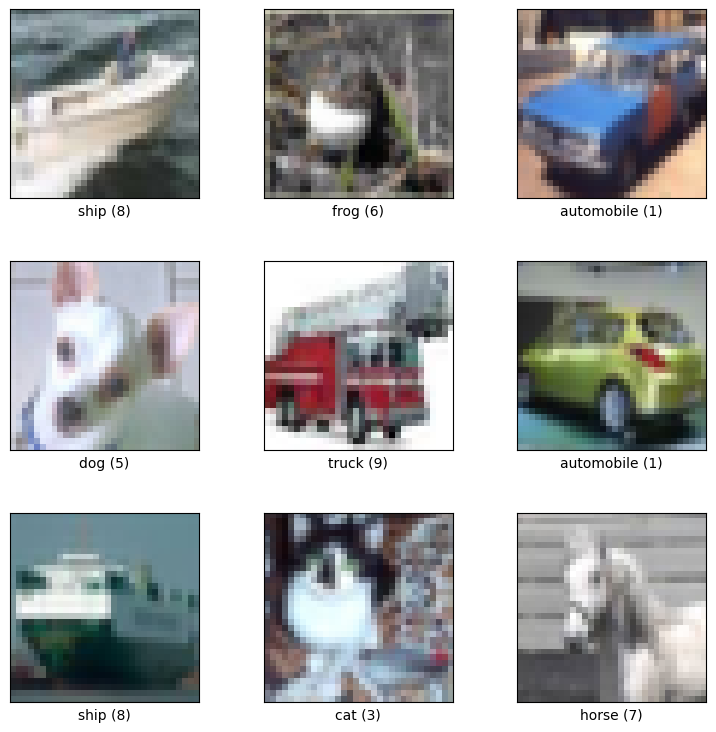

In [ ]:
fig = tfds.show_examples(test, ds_info)

In [ ]:
def dataPreProcessing(image,label):
  label = tf.one_hot(label, 10)
  image = image/ 255
  return image,label

In [ ]:
train = train.map(dataPreProcessing)
valid = valid.map(dataPreProcessing)
test = test.map(dataPreProcessing)

In [ ]:
test = test.batch(32)
train = train.batch(32)
valid = valid.batch(32)

In [ ]:
random.seed(0)
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train, validation_data=valid, epochs=50)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 76ms/step - accuracy: 0.2876 - loss: 3.2737 - val_accuracy: 0.4350 - val_loss: 1.6427
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 76ms/step - accuracy: 0.4721 - loss: 1.6561 - val_accuracy: 0.5070 - val_loss: 1.5397
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 77ms/step - accuracy: 0.5350 - loss: 1.4879 - val_accuracy: 0.5590 - val_loss: 1.4239
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 121s 77ms/step - accuracy: 0.5699 - loss: 1.4103 - val_accuracy: 0.5990 - val_loss: 1.2720
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 77ms/step - accuracy: 0.5947 - loss: 1.3562 - val_accuracy: 0.5395 - val_loss: 1.5687
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.6074 - loss: 1.3183 - val_accuracy: 0.6265 - val_loss: 1.2557
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 76ms/step - accuracy: 0.6204 - loss: 1.2857 - val_accuracy: 0.6290 - val_loss: 1.2311
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 76ms/step - accuracy: 

In [ ]:
test_loss, test_accuracy = model.evaluate(test)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")

188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.7525 - loss: 0.9355
Test accuracy: 0.7574999928474426
Test loss: 0.9341455698013306


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
for image, label in test.take(1):
  plt.figure(figsize=(10,10))
  for i in range(3):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image[i])
    # If labels are one-hot encoded, convert to class index
    if len(label[i].shape) > 0:  # Check if it's one-hot encoded
        label_index = tf.argmax(label[i]).numpy()  # Convert one-hot to class index
    else:
        label_index = int(label[i])

    plt.title(label_index)  # Use the class index as the title
    plt.axis("off")